In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm
plt.rcParams['figure.figsize']=(16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from bokeh.plotting import figure, output_file, show

In [2]:
ds = pd.read_excel('Estudiantes evaluados.xlsx')

In [3]:
ds.describe()
ds.shape

(460, 22)

# Clasificación de los estudiantes por género

In [4]:
# Clasificar por genero
ds['GENERO']= 1
import gender_detect as gd
path = 'nombres.csv'
gender_list = pd.read_csv(path)
gender_list = gd.df_to_dict(gender_list, key_column='nombre', val_column='genero')

for i, row in ds.iterrows():
    
    x = ds.loc[i, 'NOMBRE'].split()
    g = gd.get_gender2(x[-1], gender_list)
    
    if g == 'a':
        g = gd.get_gender2(x[-2], gender_list)
    
    ds.loc[i, 'GENERO'] = g
    print(ds.loc[i, 'NOMBRE'], ' - ', ds.loc[i,'GENERO'])


REYES BERDUGO ELIAS CALED  -  m
REYES BERDUGO ELIAS CALED  -  m
REYES BERDUGO ELIAS CALED  -  m
REYES BERDUGO ELIAS CALED  -  m
HERRERA MEZA ELOY ANDRES  -  m
HERRERA MEZA ELOY ANDRES  -  m
HERRERA MEZA ELOY ANDRES  -  m
HERRERA MEZA ELOY ANDRES  -  m
OTERO ROMERO SANDRA CECILIA  -  f
OTERO ROMERO SANDRA CECILIA  -  f
OTERO ROMERO SANDRA CECILIA  -  f
OTERO ROMERO SANDRA CECILIA  -  f
PALLARES MERI?O NOREILA DEL CARMEN  -  f
PALLARES MERI?O NOREILA DEL CARMEN  -  f
PALLARES MERI?O NOREILA DEL CARMEN  -  f
PALLARES MERI?O NOREILA DEL CARMEN  -  f
VIZCAINO CARRANZA ANA MARIA  -  f
VIZCAINO CARRANZA ANA MARIA  -  f
VIZCAINO CARRANZA ANA MARIA  -  f
VIZCAINO CARRANZA ANA MARIA  -  f
ARDILA RINCON JUAN RICARDO  -  m
ARDILA RINCON JUAN RICARDO  -  m
ARDILA RINCON JUAN RICARDO  -  m
ARDILA RINCON JUAN RICARDO  -  m
RICO MALDONADO KEYLA STHEFANIA  -  f
RICO MALDONADO KEYLA STHEFANIA  -  f
RICO MALDONADO KEYLA STHEFANIA  -  f
RICO MALDONADO KEYLA STHEFANIA  -  f
CLAVIJO POVEA ORLANDO JOSE  -  m

TURIZO MENDOZA ELKIN RAFAEL  -  m
TURIZO MENDOZA ELKIN RAFAEL  -  m
TURIZO MENDOZA ELKIN RAFAEL  -  m
GUERRERO DAZA BETHIANA  -  f
GUERRERO DAZA BETHIANA  -  f
GUERRERO DAZA BETHIANA  -  f
GUERRERO DAZA BETHIANA  -  f
MENDOZA BERNAL JORGE ARMANDO  -  m
MENDOZA BERNAL JORGE ARMANDO  -  m
MENDOZA BERNAL JORGE ARMANDO  -  m
MENDOZA BERNAL JORGE ARMANDO  -  m
IBA?EZ JIMENEZ SANDY MELINA  -  f
IBA?EZ JIMENEZ SANDY MELINA  -  f
IBA?EZ JIMENEZ SANDY MELINA  -  f
IBA?EZ JIMENEZ SANDY MELINA  -  f
PEREZ MARTINEZ LUVIER GUILLERMO  -  m
PEREZ MARTINEZ LUVIER GUILLERMO  -  m
PEREZ MARTINEZ LUVIER GUILLERMO  -  m
PEREZ MARTINEZ LUVIER GUILLERMO  -  m
CARRANZA RUDAS YAIR ALFONSO  -  m
CARRANZA RUDAS YAIR ALFONSO  -  m
CARRANZA RUDAS YAIR ALFONSO  -  m
CARRANZA RUDAS YAIR ALFONSO  -  m
BOLA?O AVENDA?O GERSON LEBIT  -  m
BOLA?O AVENDA?O GERSON LEBIT  -  m
BOLA?O AVENDA?O GERSON LEBIT  -  m
BOLA?O AVENDA?O GERSON LEBIT  -  m
RAMIREZ HERNANDEZ ROBERTO ANDRES  -  m
RAMIREZ HERNANDEZ ROBERTO ANDRES  -  m


## Análisis General

In [5]:
INGLES = ds[ds['COMPETENCIA'] == 'INGLES']
LECTURA_CRITICA = ds[ds['COMPETENCIA'] == 'LECTURA CRITICA']
COMPETENCIAS_CIUDADANAS = ds[ds['COMPETENCIA'] == 'COMPETENCIAS CIUDADANAS']
RAZONAMIENTO_CUANTITATIVO = ds[ds['COMPETENCIA'] == 'RAZONAMIENTO CUANTITATIVO']

print('Se van a analizar ', len(INGLES), 'estudiantes.')

Se van a analizar  115 estudiantes.


In [6]:
# puntos ingles
x1 = INGLES['X']
y1 = INGLES['Y']

# puntos lectura
x2 = LECTURA_CRITICA['X']
y2 = LECTURA_CRITICA['Y']

# puntos lectura
x3 = COMPETENCIAS_CIUDADANAS['X']
y3 = COMPETENCIAS_CIUDADANAS['Y']

# puntos lectura
x4 = RAZONAMIENTO_CUANTITATIVO['X']
y4 = RAZONAMIENTO_CUANTITATIVO['Y']

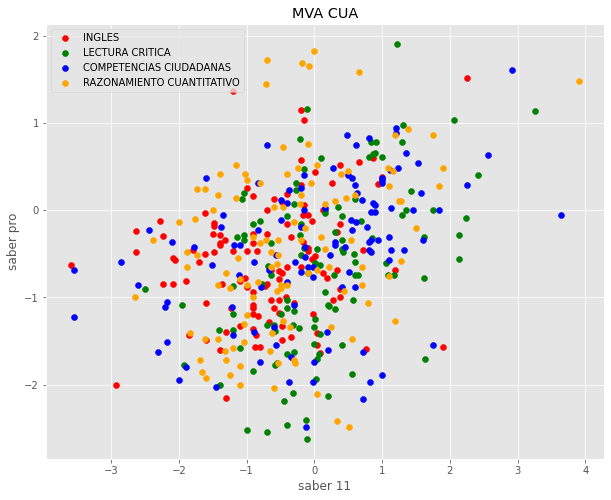

In [7]:
# Grafico PLT
plt.figure(figsize=(10, 8))

plt.scatter(x1, y1, 
           c='red', label='INGLES')
plt.scatter(x2, y2, 
            c='green', label='LECTURA CRITICA')
plt.scatter(x3, y3, 
            c='blue', label='COMPETENCIAS CIUDADANAS')
plt.scatter(x4, y4, 
            c='orange', label='RAZONAMIENTO CUANTITATIVO')
plt.title('MVA CUA')
plt.xlabel('saber 11')
plt.ylabel('saber pro')
plt.legend(loc='upper left')
plt.show()

In [8]:
# Grafico Bokek

# nombre del archivo HTML a generar
output_file("total.html")

# create a new plot with a title and axis labels
p = figure(plot_width=600, plot_height=600,
           title=None, toolbar_location="below")

p.circle(x1, y1, size=5, fill_color='red')
p.circle(x2, y2, size=5, fill_color='green')
p.circle(x3, y3, size=5, fill_color='blue')
p.circle(x4, y4, size=5, fill_color='orange')
#p.asterisk(x4, y4, size=20, color="#F0027F")

show(p)



# Análisis Competencia Inglés

## Hombres

In [9]:
inglesMasc = INGLES[INGLES['GENERO'] == 'm']
# SI(Y([@X]>0;[@Y]>0);"Zona 2";SI(Y([@X]<0;[@Y]>0);"Zona 1";SI(Y([@X]>0;[@Y]<0);"Zona 3";"Zona 4")))
z1, z2, z3, z4 = [], [], [], [] #clasificacion por zona

for i, row in inglesMasc.iterrows():
    
    x = (row['NOTA']-row['MEDIA'])/row['DESVIACION']
    y = (row['NOTA2']-row['MEDIA3'])/row['DESVIACION4']
    
    if (x > 0 and y > 0): 
        z2.append({'zona': 2, 'nombre': row['NOMBRE'], 'x': x, 'y': y})
    elif (x < 0 and y > 0):
        z1.append({'zona': 1, 'nombre': row['NOMBRE'], 'x': x, 'y': y})
    elif (x > 0 and y < 0):
        z3.append({'zona': 3, 'nombre': row['NOMBRE'], 'x': x, 'y': y})
    else:
        z4.append({'zona': 4, 'nombre': row['NOMBRE'], 'x': x, 'y': y})

print('En total hay ', inglesMasc['NOMBRE'].count(), ' estudiantes.')
print('Estudiantes en zona 1: ', len(z1), ' que corresponden al ', (len(z1) / len(inglesMasc)) * 100, '%') # mau, metele formato a este dato, solo 2 decimales
print('Estudiantes en zona 2: ', len(z2), ' que corresponden al ', (len(z2) / len(inglesMasc)) * 100, '%')
print('Estudiantes en zona 3: ', len(z3), ' que corresponden al ', (len(z3) / len(inglesMasc)) * 100, '%')
print('Estudiantes en zona 4: ', len(z4), ' que corresponden al ', (len(z4) / len(inglesMasc)) * 100, '%')

#inglesMasc.count()

En total hay  61  estudiantes.
Estudiantes en zona 1:  5  que corresponden al  8.19672131147541 %
Estudiantes en zona 2:  2  que corresponden al  3.278688524590164 %
Estudiantes en zona 3:  10  que corresponden al  16.39344262295082 %
Estudiantes en zona 4:  44  que corresponden al  72.1311475409836 %


In [10]:
# Grafico bokek

# saber 11
xIngMasc = inglesMasc['X']


# saber pro
yIngMasc = inglesMasc['Y']

# nombre del archivo HTML a generar
output_file("ingles-hombres.html")

# create a new plot with a title and axis labels
plot = figure(plot_width=600, plot_height=600,
           title='Ingles Hombres', y_axis_type='linear', y_range=[-3,3],
           x_axis_type='linear',x_range=[-3,3],toolbar_location="below")

plot.circle(xIngMasc, yIngMasc, size=5)

show(plot)



## Mujeres

In [11]:
inglesFem = INGLES[INGLES['GENERO'] == 'f']
# SI(Y([@X]>0;[@Y]>0);"Zona 2";SI(Y([@X]<0;[@Y]>0);"Zona 1";SI(Y([@X]>0;[@Y]<0);"Zona 3";"Zona 4")))
zf1, zf2, zf3, zf4 = [], [], [], [] #clasificacion por zona

for i, row in inglesFem.iterrows():
    
    x = (row['NOTA']-row['MEDIA'])/row['DESVIACION']
    y = (row['NOTA2']-row['MEDIA3'])/row['DESVIACION4']
    
    if (x > 0 and y > 0): 
        zf2.append({'zona': 2, 'nombre': row['NOMBRE'], 'x': x, 'y': y})
    elif (x < 0 and y > 0):
        zf1.append({'zona': 1, 'nombre': row['NOMBRE'], 'x': x, 'y': y})
    elif (x > 0 and y < 0):
        zf3.append({'zona': 3, 'nombre': row['NOMBRE'], 'x': x, 'y': y})
    else:
        zf4.append({'zona': 4, 'nombre': row['NOMBRE'], 'x': x, 'y': y})

print('En total hay ', inglesFem['NOMBRE'].count(), ' estudiantes.')
print('Estudiantes en zona 1: ', len(zf1), ' que corresponden al ', (len(zf1) / len(inglesMasc)) * 100, '%')
print('Estudiantes en zona 2: ', len(zf2), ' que corresponden al ', (len(zf2) / len(inglesMasc)) * 100, '%')
print('Estudiantes en zona 3: ', len(zf3), ' que corresponden al ', (len(zf3) / len(inglesMasc)) * 100, '%')
print('Estudiantes en zona 4: ', len(zf4), ' que corresponden al ', (len(zf4) / len(inglesMasc)) * 100, '%')

#inglesMasc.count()

En total hay  54  estudiantes.
Estudiantes en zona 1:  6  que corresponden al  9.836065573770492 %
Estudiantes en zona 2:  6  que corresponden al  9.836065573770492 %
Estudiantes en zona 3:  6  que corresponden al  9.836065573770492 %
Estudiantes en zona 4:  36  que corresponden al  59.01639344262295 %


In [12]:
# Grafico bokek

# saber 11
xIngFem = inglesFem['X']


# saber pro
yIngFem = inglesFem['Y']

# nombre del archivo HTML a generar
output_file("ingles-mujeres.html")

# create a new plot with a title and axis labels
plot = figure(plot_width=600, plot_height=600,
           title='Ingles Hombres', y_axis_type='linear', y_range=[-3,3],
           x_axis_type='linear',x_range=[-3,3],toolbar_location="below")

plot.circle(xIngFem, yIngFem, size=5)

show(plot)